In [1]:
# export full genome
from pybedtools import genome_registry, chromsizes_to_file, chromsizes
chromsizes_to_file(chromsizes('hg19'), '../download/genome/hg19.genome')

'../download/genome/hg19.genome'

In [2]:
assembly_path = "../download/genome/hg19_reduced.genome"

In [3]:
import pandas as pd
import numpy as np
from pybedtools import BedTool

In [4]:
store = pd.HDFStore("../storage/encode_overlaps.hdf")
store_repeat = pd.HDFStore("../storage/repeatmasker_staging.hdf")

In [5]:
store.keys()

['/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped',
 '/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped_bed']

In [6]:
store_repeat.keys()

['/DNA',
 '/DNA_Kolobok',
 '/DNA_Kolobok_bed',
 '/DNA_MULE_MuDR',
 '/DNA_MULE_MuDR_bed',
 '/DNA_Merlin',
 '/DNA_Merlin_bed',
 '/DNA_PIF_Harbinger',
 '/DNA_PIF_Harbinger_bed',
 '/DNA_PiggyBac',
 '/DNA_PiggyBac_bed',
 '/DNA_TcMar',
 '/DNA_TcMar_Mariner',
 '/DNA_TcMar_Mariner_bed',
 '/DNA_TcMar_Pogo',
 '/DNA_TcMar_Pogo_bed',
 '/DNA_TcMar_Tc1',
 '/DNA_TcMar_Tc1_bed',
 '/DNA_TcMar_Tc2',
 '/DNA_TcMar_Tc2_bed',
 '/DNA_TcMar_Tigger',
 '/DNA_TcMar_Tigger_bed',
 '/DNA_TcMar_bed',
 '/DNA_TcMar_qm',
 '/DNA_TcMar_qm_bed',
 '/DNA_bed',
 '/DNA_hAT',
 '/DNA_hAT_Ac',
 '/DNA_hAT_Ac_bed',
 '/DNA_hAT_Blackjack',
 '/DNA_hAT_Blackjack_bed',
 '/DNA_hAT_Charlie',
 '/DNA_hAT_Charlie_bed',
 '/DNA_hAT_Tag1',
 '/DNA_hAT_Tag1_bed',
 '/DNA_hAT_Tip100',
 '/DNA_hAT_Tip100_bed',
 '/DNA_hAT_Tip100_qm',
 '/DNA_hAT_Tip100_qm_bed',
 '/DNA_hAT_bed',
 '/DNA_hAT_qm',
 '/DNA_hAT_qm_bed',
 '/DNA_qm',
 '/DNA_qm_PiggyBac_qm',
 '/DNA_qm_PiggyBac_qm_bed',
 '/DNA_qm_bed',
 '/DNA_qm_hAT_Tip100_qm',
 '/DNA_qm_hAT_Tip100_qm_bed',
 '/L

In [7]:
store.close()
store_repeat.close()

In [8]:
encode_metadata = pd.read_hdf("../storage/encode_staging.hdf", "encode_metadata")

In [9]:
encode_metadata.query("assembly == 'hg19' & biosample_type=='tissue'")['biosample_term_name'].unique()

array(['large intestine', 'stomach', 'brain', 'adrenal gland', 'amnion',
       'placenta', 'urinary bladder', 'skeletal muscle tissue',
       'muscle layer of duodenum', 'thymus', 'heart', 'eye',
       'small intestine', 'muscle of leg', 'tongue', 'umbilical cord',
       'lung', 'pancreas', 'female gonad', 'psoas muscle',
       'heart left ventricle', 'layer of hippocampus',
       'middle frontal area 46', 'muscle of trunk', 'cingulate gyrus',
       'midbrain', 'globus pallidus', 'substantia nigra',
       'middle frontal gyrus', 'heart right ventricle', 'mucosa of rectum',
       'temporal lobe', 'endocrine pancreas', 'caudate nucleus', 'liver',
       'angular gyrus', 'muscle layer of colon', 'sigmoid colon',
       'colonic mucosa', 'aorta', 'spleen', 'spinal cord',
       'rectal smooth muscle tissue', 'stomach smooth muscle',
       'right cardiac atrium', 'kidney', 'left kidney', 'esophagus'], dtype=object)

In [10]:
encode_metadata['method'].unique()

array(['H3K27ac', 'DNase_H3K27ac', 'DNase'], dtype=object)

In [11]:
encode_metadata.query("assembly == 'hg19' & biosample_term_name == 'brain'")

,accession,assembly,biosample_term_id,biosample_term_name,biosample_type,description,developmental_slims,encyclopedia_version,month_released,organ_slims,organism,system_slims,bed_filename,bed_filepath,merged,method
21,ENCSR677OUZ,hg19,UBERON:0000955,brain,tissue,Enhancer-like regions using DNase-only for brain,[ectoderm],3,"June, 2016",[brain],/organisms/human/,[central nervous system],ENCFF975MKX.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase
187,ENCSR522RVJ,hg19,UBERON:0000955,brain,tissue,Enhancer-like regions using DNase-only for brain,[ectoderm],3,"June, 2016",[brain],/organisms/human/,[central nervous system],ENCFF279ZOU.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase
290,ENCSR614XSX,hg19,UBERON:0000955,brain,tissue,Enhancer-like regions using DNase-only for brain,[ectoderm],3,"June, 2016",[brain],/organisms/human/,[central nervous system],ENCFF030XAC.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase


In [56]:
encode_bed = BedTool("../download/ENCODE/ENCSR522RVJ/files/ENCFF279ZOU/ENCFF279ZOU.bed.gz")

In [40]:
encode_bed.count()

74312

In [41]:
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "SINE_Alu_bed")
repeat_bed = BedTool().from_dataframe(repeat_bed_df)

In [42]:
encode_bed.head()

chr1	91852606	91853249	Distal-Prediction-Boundary-1	1	.	91852880	91853030	255,235,200
 chr1	156186019	156186829	Distal-Prediction-Boundary-2	1	.	156186360	156186510	255,235,200
 chr8	70602170	70602736	Distal-Prediction-Boundary-3	1	.	70602360	70602510	255,235,200
 chr11	85194851	85195324	Distal-Prediction-Boundary-4	1	.	85195040	85195190	255,235,200
 chr17	33477932	33478557	Distal-Prediction-Boundary-5	1	.	33478140	33478290	255,235,200
 chr5	71146526	71147108	Distal-Prediction-Boundary-6	1	.	71146760	71146910	255,235,200
 chr19	36066304	36066961	Distal-Prediction-Boundary-7	1	.	36066500	36066650	255,235,200
 chr17	31149261	31150880	Distal-Prediction-Boundary-8	1	.	31149620	31149770	255,235,200
 chr2	230045281	230045822	Distal-Prediction-Boundary-9	1	.	230045480	230045630	255,235,200
 chr19	24183120	24184274	Distal-Prediction-Boundary-10	1	.	24183620	24183770	255,235,200
 

In [43]:
encode_bed.count()

74312

In [44]:
repeat_bed.count()

1177252

In [45]:
repeat_bed.to_dataframe()['chrom'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
       'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
       'chr22', 'chr21'], dtype=object)

In [57]:
encode_bed_df = encode_bed.to_dataframe()

In [47]:
# removing chroms
chroms = encode_bed_df['chrom'].unique()
repeat_bed = BedTool().from_dataframe(repeat_bed_df.query('chrom in @chroms'))

In [48]:
repeat_bed.count()

1177252

### Alu size distribution

In [49]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

In [60]:
encode_bed_df['size'] = encode_bed_df.apply(lambda row: compute_size(row), axis=1)

In [50]:
# Alu size
repeat_bed_df = repeat_bed.to_dataframe()
repeat_bed_df['size'] = repeat_bed_df.apply(lambda row: compute_size(row), axis=1)

In [51]:
repeat_sizes_df = repeat_bed_df[['size']]

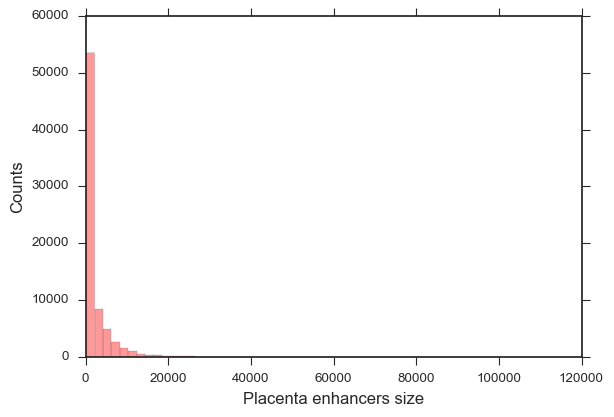

In [61]:
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2})
ax = sns.distplot(encode_bed_df[['size']], kde=False, color='red')
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('Placenta enhancers size', size=12)

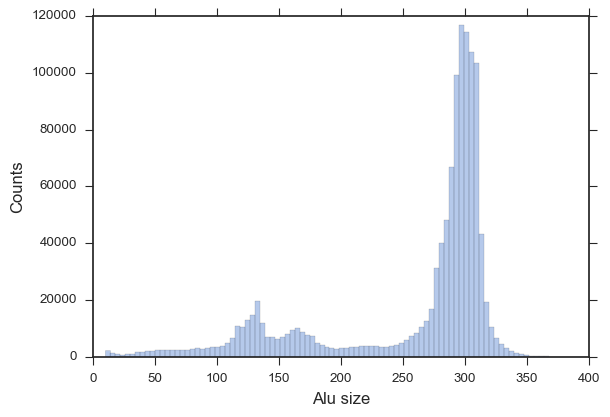

In [52]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("paper", font_scale=1.2, rc={"lines.linewidth": 2})
ax = sns.distplot(repeat_sizes_df, kde=False, bins=200)
ax.set_xlim(0,400)
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('Alu size', size=12)

## Full Alu in enhancer

In [62]:
real_count = encode_bed.intersect(repeat_bed, F=1).count()
real_count

49962

In [63]:
repeat_bed.intersect(encode_bed, f=1).count()

49962

In [64]:
encode_bed.sort().fisher(repeat_bed.sort(), F=1, g=assembly_path)

<FisherOutput at 4857970304>
# Number of query intervals: 74312
# Number of db intervals: 1175369
# Number of overlaps: 49962
# Number of possible intervals (estimated): 1286803
# phyper(49962 - 1, 74312, 1286803 - 74312, 1175369, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 49962        | 24350        |
# not in -a | 1125407      | 87084        |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
1	0	0	0.159

In [65]:
encode_bed.sort().jaccard(repeat_bed.sort(), F=1, g=assembly_path)

{'intersection': 12470309,
 'jaccard': 0.0279639,
 'n_intersections': 49922,
 'union-intersection': 445943560}

### Null Model 1: shuffled enhancers

In [66]:
def compare_null_model(counts, real_count):
    print("mean:", np.mean(counts), "std:", np.std(counts))
    import seaborn as sns
    %matplotlib inline
    import scipy.stats as st
    sns.distplot(counts, kde=False, fit=st.norm, bins=20)
    z_score =(real_count - np.mean(counts))/np.std(counts)
    p_values = st.norm.sf(abs(z_score))
    print("z-score:", z_score, "p-value:",p_values)

In [67]:
def build_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(bed_overlap_with, F=1)
    return core_null_model_intersection.count()

In [68]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 55098.6 std: 489.458026801
z-score: -10.4944647319 p-value: 4.57976870841e-26


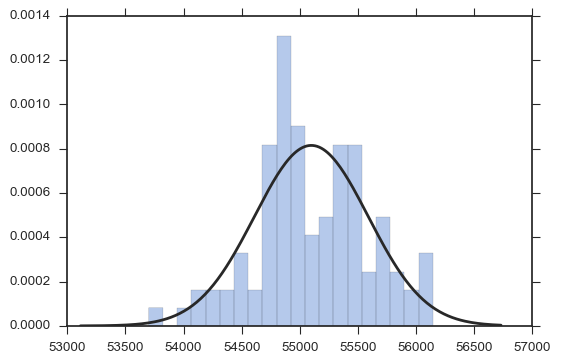

In [69]:
compare_null_model(counts, real_count)

### Null Model 2: shuffled repeats

In [70]:
def build_shuffled_full_overlap_with(bed, bed_overlap_with, assembly_path):
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [71]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_full_overlap_with)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 55140.16 std: 211.448845823
z-score: -24.488948993 p-value: 9.68603257937e-133


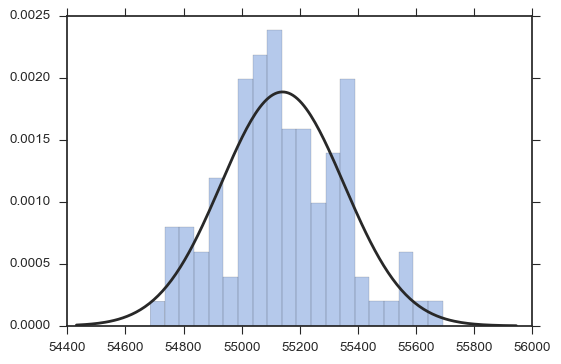

In [72]:
compare_null_model(counts, real_count)

### Null Model 3: shuffled on shuffled

In [73]:
def build_shuffled_on_shuffled_full_overlap(bed, bed_overlap_with, assembly_path):
    shuffled_bed = bed.shuffle(g=assembly_path)
    shuffled_bed_with = bed_overlap_with.shuffle(g=assembly_path)
    core_null_model_intersection = shuffled_bed.intersect(shuffled_bed_with, F=1)
    return core_null_model_intersection.count()

In [74]:
from joblib import Parallel, delayed
import multiprocessing
counts = []
num_cores = multiprocessing.cpu_count()
counts.append(Parallel(n_jobs=num_cores)(delayed(build_shuffled_on_shuffled_full_overlap)
                                             (encode_bed, repeat_bed, assembly_path)
                                             for i in range(0, 100)))

mean: 55113.96 std: 252.483025964
z-score: -20.4051736956 p-value: 7.52132566873e-93


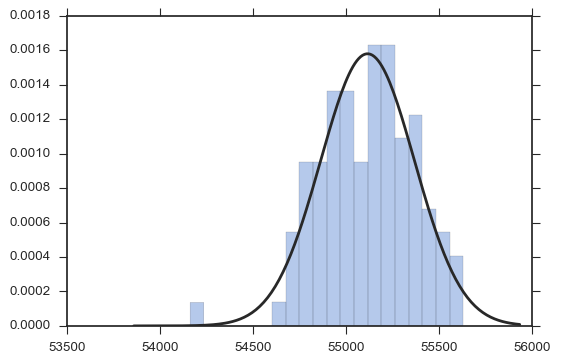

In [75]:
compare_null_model(counts, real_count)

## Counting occurences per enhancer

In [76]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [77]:
overlap_occurences_df = encode_bed.intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()
overlap_occurences_null_2_df = encode_bed.intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_null_3_df = encode_bed.shuffle(g=assembly_path).intersect(repeat_bed.shuffle(g=assembly_path), F=1, c=True).to_dataframe()
overlap_occurences_complement_df = encode_bed.sort().complement(g=assembly_path).intersect(repeat_bed, F=1, c=True).to_dataframe()

In [78]:
occ_cols = ['chrom', 'start', 'end', 'name', 'score', 'strand', 'occurences']
overlap_occurences_df.columns = occ_cols
overlap_occurences_null_df.columns = occ_cols
overlap_occurences_null_2_df.columns = occ_cols
overlap_occurences_null_3_df.columns = occ_cols
overlap_occurences_complement_df.columns = ['chrom', 'start', 'end', 'occurences']

In [79]:
occurences = overlap_occurences_df.query("occurences > 0")['occurences'].tolist()
occurences_null = overlap_occurences_null_df.query("occurences > 0")['occurences'].tolist()
occurences_null_2 = overlap_occurences_null_2_df.query("occurences > 0")['occurences'].tolist()
occurences_null_3 = overlap_occurences_null_3_df.query("occurences > 0")['occurences'].tolist()
occurences_complement = overlap_occurences_complement_df.query("occurences > 0")['occurences'].tolist()

In [80]:
occ_freq, occ_base = np.histogram(occurences, bins=range(1,26))
occ_freq_null, _ = np.histogram(occurences_null, bins=range(1,26))
occ_freq_null_2, _ = np.histogram(occurences_null_2, bins=range(1,26))
occ_freq_null_3, _ = np.histogram(occurences_null_3, bins=range(1,26))
occ_freq_complement, _ = np.histogram(occurences_complement, bins=range(1,26))

occ_ratio = occ_freq / sum(occ_freq)
occ_ratio_null = occ_freq_null / sum(occ_freq_null)
occ_ratio_null_2 = occ_freq_null_2 / sum(occ_freq_null_2)
occ_ratio_null_3 = occ_freq_null_3 / sum(occ_freq_null_3)
occ_ratio_complement = occ_freq_complement / sum(occ_freq_complement)

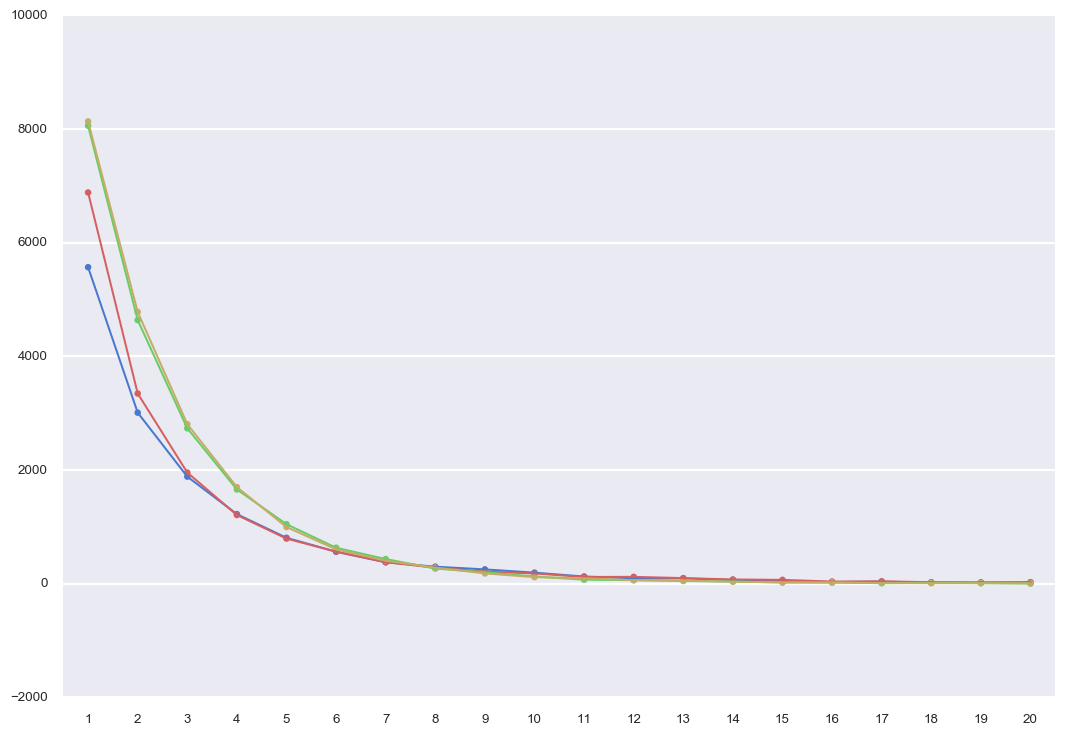

In [88]:
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline
#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
sns.set_style("darkgrid")
g1 = sns.pointplot(x=occ_base[:20], y=occ_freq[:20], color='b')
g2 = sns.pointplot(x=occ_base[:20], y=occ_freq_null[:20], color='r')
g3 = sns.pointplot(x=occ_base[:20], y=occ_freq_null_2[:20], color='g')
g4 = sns.pointplot(x=occ_base[:20], y=occ_freq_null_3[:20], color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
#g1.set(yscale='log')

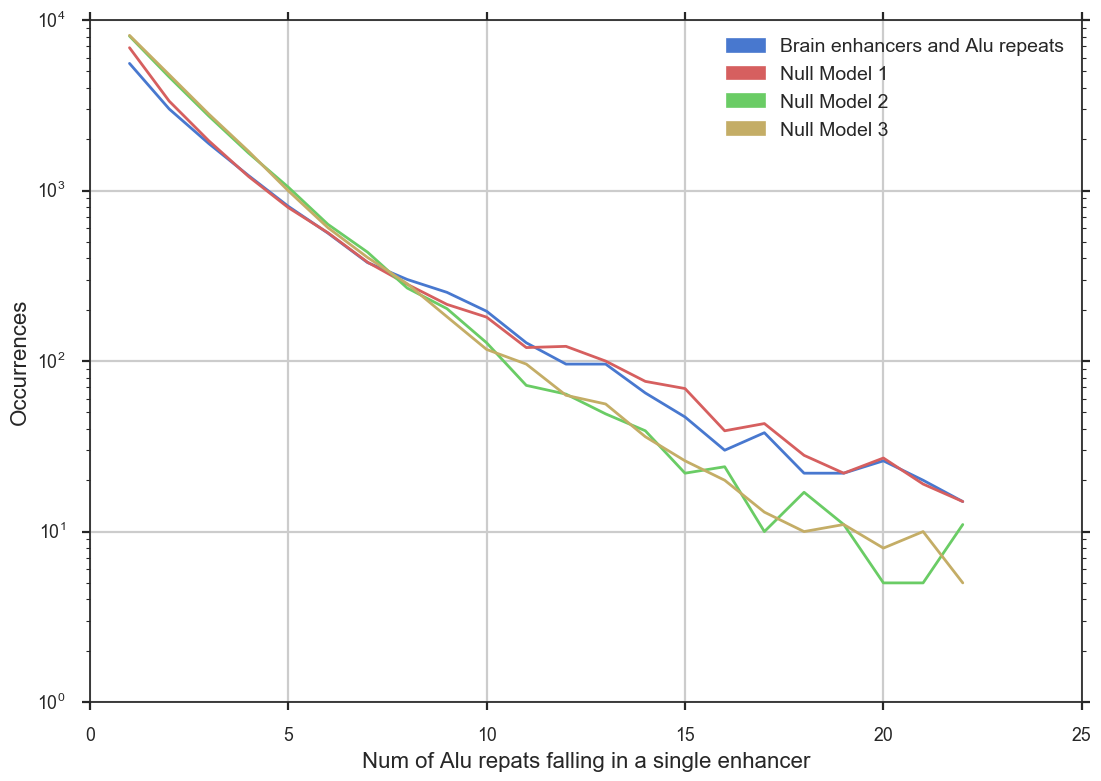

In [92]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib.patches as mpatches
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 2})

fig = plt.figure()
ax = fig.add_subplot(111)

max_val = 22

g1 = plt.plot(occ_base[:max_val], occ_freq[:max_val], color='b')
g2 = plt.plot(occ_base[:max_val], occ_freq_null[:max_val], color='r')
g3 = plt.plot(occ_base[:max_val], occ_freq_null_2[:max_val], color='g')
g4 = plt.plot(occ_base[:max_val], occ_freq_null_3[:max_val], color='y')
#g5 = sns.pointplot(x=occ_base[:10], y=occ_freq_complement[:10], color='pink')
ax.axes.set_yscale('log')
ax.grid()

#sns.despine(offset=10, trim=True)

ax.set_ylabel('Occurrences', size=16)
ax.set_xlabel('Num of Alu repats falling in a single enhancer', size=16)

blue_patch = mpatches.Patch(color='b', label='Brain enhancers and Alu repeats')
red_patch = mpatches.Patch(color='r', label='Null Model 1')
green_patch = mpatches.Patch(color='g', label='Null Model 2')
yellow_patch = mpatches.Patch(color='y', label='Null Model 3')

plt.legend(handles=[blue_patch, red_patch, green_patch, yellow_patch], fontsize=14, loc=1)

In [96]:
import scipy.stats as st
print(st.expon.fit(occ_freq[:max_val]))
print(st.expon.fit(occ_freq_null[:max_val]))
print(st.expon.fit(occ_freq_null_2[:max_val]))
print(st.expon.fit(occ_freq_null_3[:max_val]))

(14.999999999996994, 657.5453717216011)
(14.99999993345585, 736.05196407227254)
(4.9999999999965778, 910.36367023552054)
(4.9999999920727012, 921.03464757302856)


In [148]:
import numpy as np
import scipy
x = occ_base[:24]
y = occ_freq[:24]
param, covar = scipy.optimize.curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y, p0=(0.1, -0.9))

/Users/manuel/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp


In [149]:
print(param, covar)

[  8.96860993e+03  -5.03717001e-01] [[  6.88111088e+04  -3.56795352e+00]
 [ -3.56795352e+00   2.52558921e-04]]


In [141]:
a_fit = param[0]
b_fit = param[1]

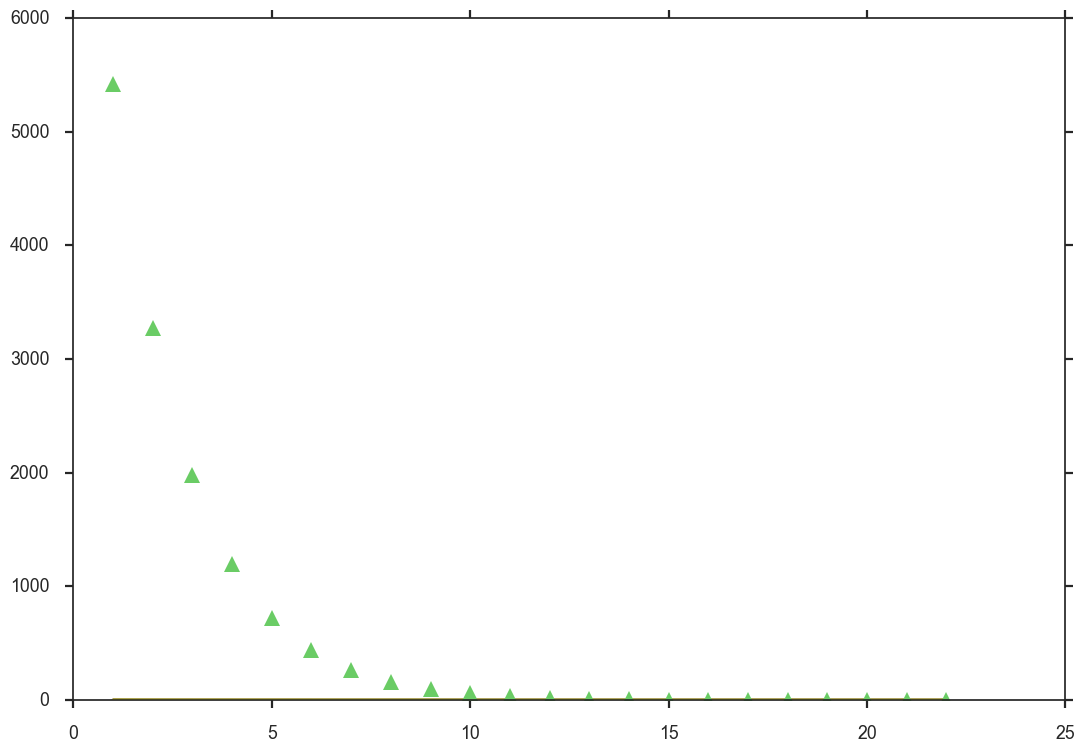

In [142]:
# ratios normalized
import matplotlib.pyplot as plt
plt.plot(occ_base[:max_val], occ_ratio[:max_val], c='blue')
plt.plot(occ_base[:max_val], occ_ratio_null[:max_val], c='red')
plt.plot(occ_base[:max_val], occ_ratio_null_2[:max_val], c='green')
ax = plt.plot(occ_base[:max_val], occ_ratio_null_3[:max_val], c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')
t =  occ_base[:max_val]
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.plot(t, a_fit*np.exp(b_fit*t), 'g^')
plt.show()
#a*np.exp(b*t)

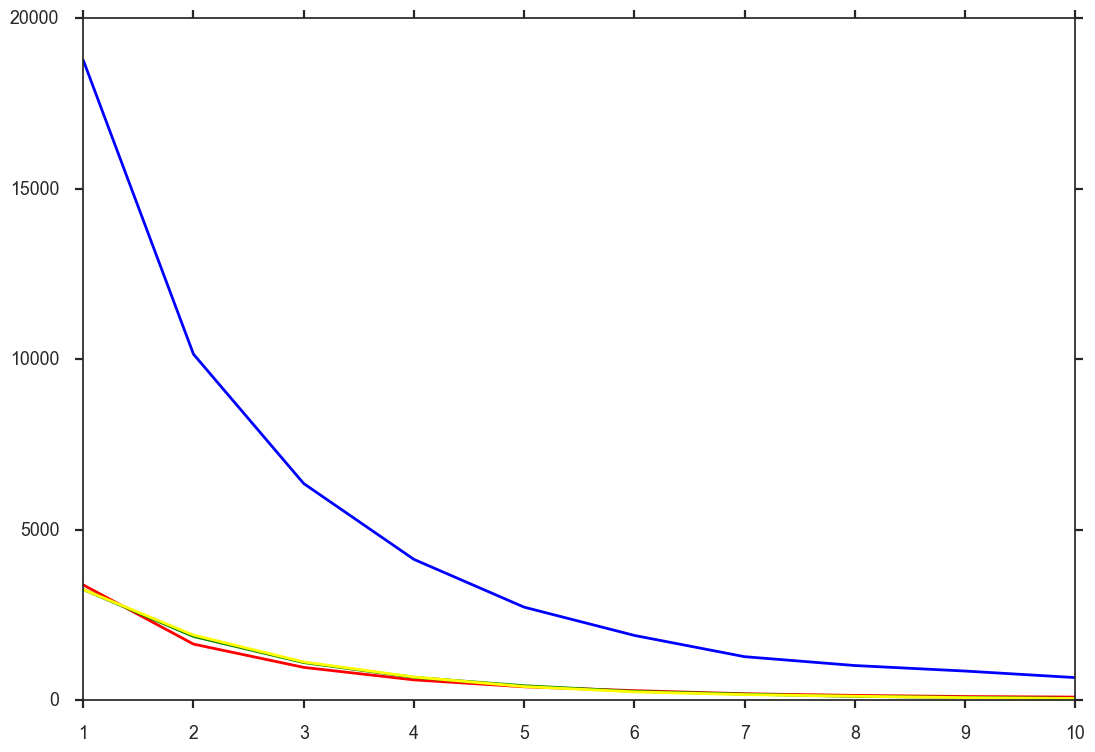

In [94]:
# ratios normalized adjusted (with overlap count)
import matplotlib.pyplot as plt
plt.plot(occ_base[:10], occ_ratio[:10]*real_count, c='blue')
plt.plot(occ_base[:10], occ_ratio_null[:10]*8112, c='red')
plt.plot(occ_base[:10], occ_ratio_null_2[:10]*8108, c='green')
plt.plot(occ_base[:10], occ_ratio_null_3[:10]*8125, c='yellow')
#plt.plot(occ_base[:10], occ_ratio_complement[:10], c='pink')

plt.show()


## Closeness distribution

In [95]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline
import numpy as np
from joblib import Parallel, delayed
import multiprocessing

def compute_centers(closeness_df):
    closeness_df['centered_locus'] = round(
        (closeness_df['end'] - closeness_df['start'])/2 
        + closeness_df['start']).astype(int)

    closeness_df['close_centered_locus'] = round(
        (closeness_df['close_end'] - closeness_df['close_start'])/2 
        + closeness_df['close_start']).astype(int)

    closeness_df['centered_distance'] = closeness_df['close_centered_locus'] - closeness_df['centered_locus'] 
    return closeness_df

def compute_closeness_df(sorted_bed, sorted_bed_with):
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                     'close_chrom', 'close_start','close_end', 
                     'close_name', 'close_score', 'close_strand', 'distance']
    closeness = sorted_bed.closest(sorted_bed_with, D='a')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    return closeness_df

def build_closeness_df(bed, bed_with):
    
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                         'close_chrom', 'close_start','close_end', 
                         'close_name', 'close_score', 'close_strand', 'distance']
    
    sorted_bed = bed.sort()
    sorted_bed_with = bed_with.sort()
    
    # real on real
    closeness = sorted_bed.closest(sorted_bed_with, D='a', t='all')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    
    return closeness_df

In [50]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [51]:
repeat_closeness_df = build_closeness_df(encode_bed, repeat_bed)

(-5000, 5000)

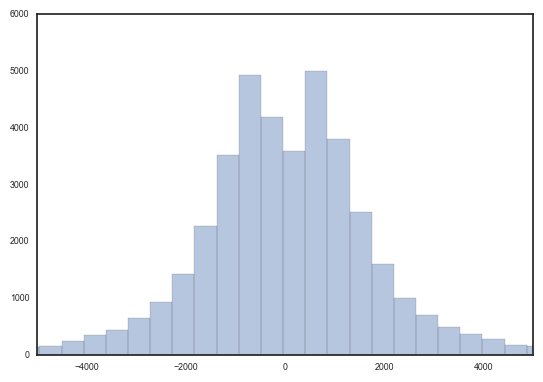

In [76]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_df[['centered_distance']], kde=False, bins=1000)
g1.set_xlim(-5000, 5000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 1 Closeness

In [53]:
encode_bed_shuffled = encode_bed.shuffle(g=assembly_path)
repeat_closeness_null_df = build_closeness_df(encode_bed_shuffled, repeat_bed)

(-300000, 300000)

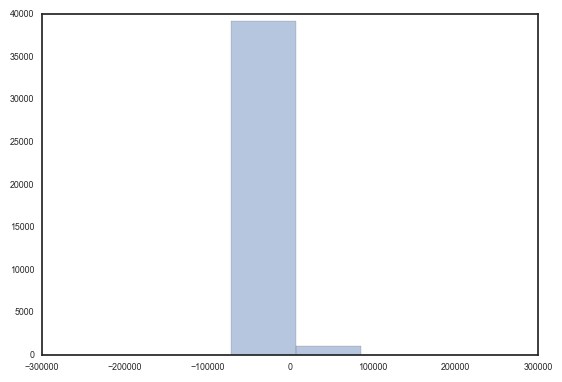

In [67]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null_df[['centered_distance']], kde=False, bins=1000)
g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 2 Closeness

In [55]:
repeat_bed_shuffled = repeat_bed.shuffle(g=assembly_path)
repeat_closeness_null2_df = build_closeness_df(encode_bed, repeat_bed_shuffled)

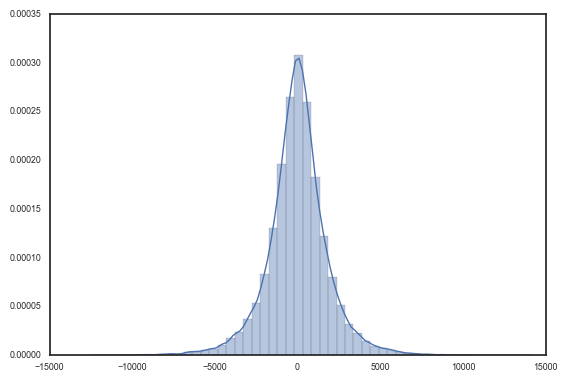

In [56]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null2_df[['centered_distance']], kde=True)
#g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Null Model 3 Closeness

In [57]:
repeat_closeness_null3_df = build_closeness_df(encode_bed_shuffled, repeat_bed_shuffled)

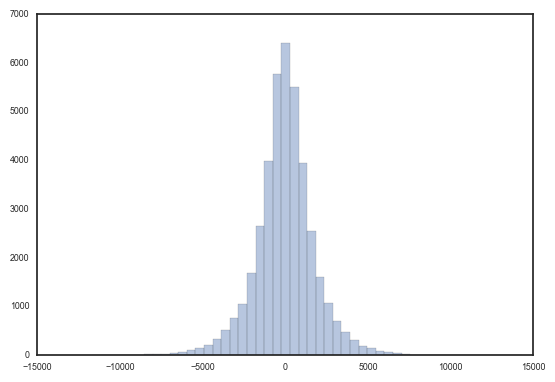

In [58]:
sns.set(style="white")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_null3_df[['centered_distance']], kde=False)
#g1.set_xlim(-300000, 300000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

### Comparing Closeness Distributions

In [59]:
centered_distance_distribution = repeat_closeness_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null = repeat_closeness_null_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null_2 = repeat_closeness_null2_df.query("centered_distance >=0")['centered_distance']
centered_distance_distribution_null_3 = repeat_closeness_null3_df.query("centered_distance >=0")['centered_distance']

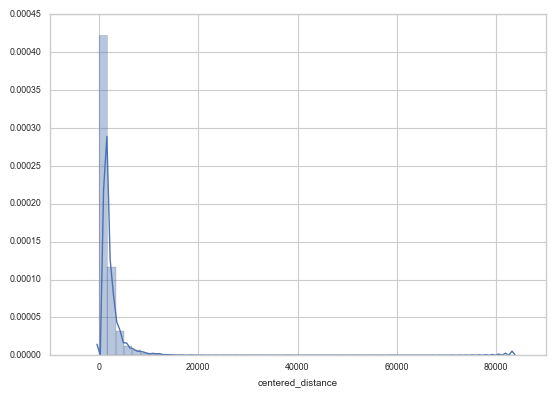

In [60]:
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(centered_distance_distribution, kde=True)
#g1.set_xlim(0, 10000)

In [77]:
freqs, base = np.histogram(centered_distance_distribution, bins=3000)
freqs_null, base_null = np.histogram(centered_distance_distribution_null, bins=base)
freqs_null_2, base_null_2 = np.histogram(centered_distance_distribution_null_2, bins=base)
freqs_null_3, base_null_3 = np.histogram(centered_distance_distribution_null_3, bins=base)

In [78]:
cumulative = np.cumsum(freqs) /sum(freqs)
cumulative_null = np.cumsum(freqs_null) / sum(freqs_null)
cumulative_null_2 = np.cumsum(freqs_null_2) / sum(freqs_null_2)
cumulative_null_3 = np.cumsum(freqs_null_3) / sum(freqs_null_3)

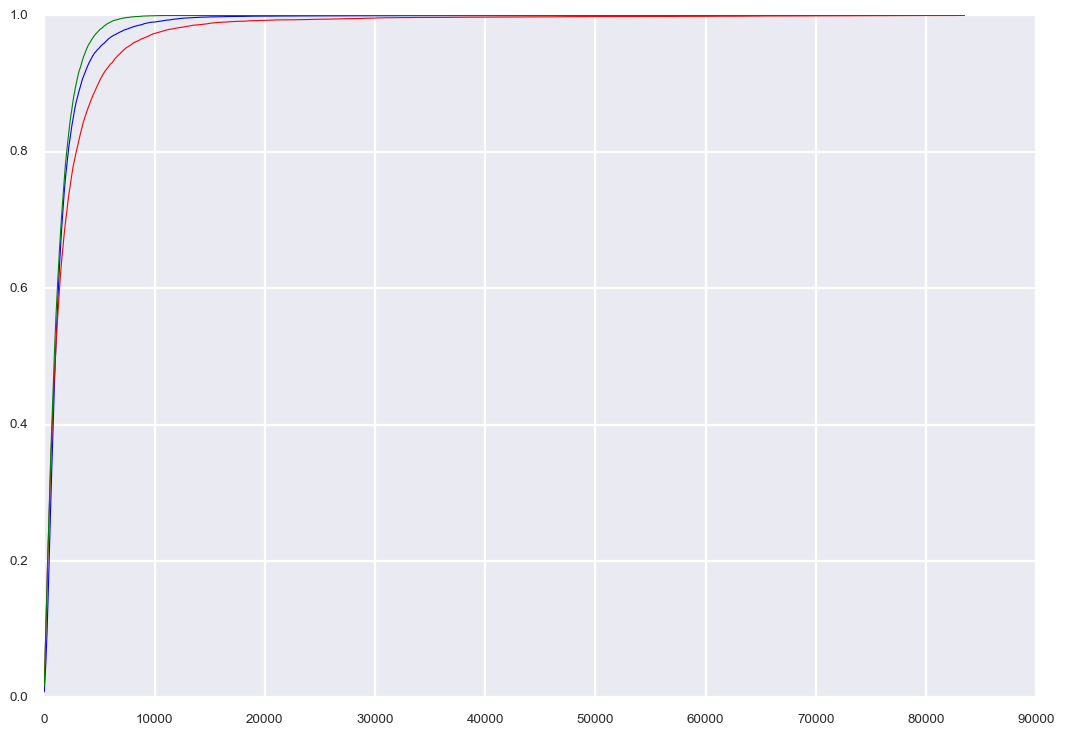

In [79]:
import matplotlib.pyplot as plt
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})
sns.set_style("darkgrid")

plt.plot(base[:-1], cumulative, c='blue')
plt.plot(base_null[:-1], cumulative_null, c='red')
plt.plot(base_null_2[:-1], cumulative_null_2, c='green')
#plt.plot(base_null_3[:-1], cumulative_null_3, c='yellow')
plt.show()


## Densities

In [ ]:
# density
# assuming expected number of MIR-enhancers as
# average genome-wide density of enhancers (enhancers/bp) * total bp length of all MIRs

def compute_expected_number(name1_bed_df, name2_bed_df, name1, name2):
    genome_size = 3095677412
    #enhancers_bed_df['size'] = enhancers_bed_df['end'] - enhancers_bed_df['start']
    name1_density = len(name1_bed_df) /  genome_size
    name2_bed_df['size'] = name2_bed_df['end'] - name2_bed_df['start']
    name2_len = name2_bed_df['size'].sum()
    print(name1, 'density =', name1_density, '(num of intervals)/(genome bp)')
    print(name2,'length =', name2_len, 'bp')
    print('Expected number of', name2, name1, '=', int(round(name1_density * name2_len)))

In [ ]:
compute_expected_number(encode_bed_df, repeat_bed_df, 'K562 enhancers', 'Sine/MIR')

In [ ]:
def infer_TSS_proximity(row):
    description = row['name']
    if 'Distal' in description:
        return 'Distal'
    if 'Proximal' in description:
        return 'Proximal'

In [ ]:
encode_bed_df['TSS_proximity'] = encode_bed_df.apply(lambda r: infer_TSS_proximity(r), axis=1)

In [ ]:
proximal_df = encode_bed_df.query("TSS_proximity == 'Proximal'")
distal_df = encode_bed_df.query("TSS_proximity == 'Distal'")

In [ ]:
len(distal_df)

In [ ]:
len(proximal_df)

In [ ]:
compute_expected_number(distal_df, repeat_bed_df, "Distal enhancers", "Sine/MIR")

In [ ]:
compute_expected_number(proximal_df, repeat_bed_df, "Proximal enhancers", "Sine/MIR")

In [ ]:
genes_bed = BedTool("../download/genome/knownGene_hg19.bed")

In [ ]:
genes_bed.count()

In [ ]:
genes_bed_df = genes_bed.to_dataframe()

In [ ]:
chrom_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
              'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
              'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
              'chr22', 'chr21']

genes_bed_df = genes_bed_df.query("chrom in @chrom_list")

In [ ]:
genes_bed_df['chrom'].unique()

In [ ]:
genes_bed = BedTool().from_dataframe(genes_bed_df)

In [ ]:
genes_bed.count()

In [ ]:
compute_expected_number(genes_bed_df, repeat_bed_df, 'Genes', 'Sine/MIR')

In [ ]:
# genic enhancers: enhancers in genic regions
genic_enhancers_bed = encode_bed.intersect(genes_bed, f=1, u=True)

In [ ]:
genic_enhancers_bed.count()

In [ ]:
# genic non-enhancers: genic regions without enhancers
genic_non_enhancers_bed = genes_bed.subtract(genic_enhancers_bed, A=True)

In [ ]:
genic_non_enhancers_bed.intersect(genic_enhancers_bed).count()

In [ ]:
# non-genic enhancers: enhancers outside genic regions
non_genic_enhancers_bed = encode_bed.subtract(genes_bed, f=1, A=True)

In [ ]:
non_genic_enhancers_bed.count()

In [ ]:
non_genic_enhancers_bed.count() + genic_enhancers_bed.count() == encode_bed.count()

In [ ]:
# 200 bp regions around core of enhancers
enhancers_regions_bed = encode_bed_cores.slop(g=assembly_path, b=200)

In [ ]:
enhancers_regions_bed.count()

In [ ]:
genes_bed_df['size'] = genes_bed_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
genes_bed_df[['size']].quantile(np.arange(0,1,0.1))

In [ ]:
def compute_density_region(bed_in_region_df, region_df):
    region_size = region_df['size'].sum()
    bed_in_region_size = bed_in_region_df['size'].sum()
    
    return bed_in_region_size / region_size

In [ ]:
repeat_reg1_df = repeat_bed.intersect(genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg2_df = repeat_bed.intersect(genic_non_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg3_df = repeat_bed.intersect(non_genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
repeat_reg4_df = repeat_bed.intersect(enhancers_regions_bed, f=1e-09, u=True).to_dataframe()

In [ ]:
reg1_df = genic_enhancers_bed.to_dataframe()
reg2_df = genic_non_enhancers_bed.to_dataframe()
reg3_df = non_genic_enhancers_bed.to_dataframe()
reg4_df = enhancers_regions_bed.to_dataframe()

reg1_df['size'] =  reg1_df.apply(lambda row: compute_size(row), axis=1)
reg2_df['size'] =  reg2_df.apply(lambda row: compute_size(row), axis=1)
reg3_df['size'] =  reg3_df.apply(lambda row: compute_size(row), axis=1)
reg4_df['size'] =  reg4_df.apply(lambda row: compute_size(row), axis=1)

repeat_reg1_df['size'] = repeat_reg1_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg2_df['size'] = repeat_reg2_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg3_df['size'] = repeat_reg3_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg4_df['size'] = repeat_reg4_df.apply(lambda row: compute_size(row), axis=1)

In [ ]:
d1 = compute_density_region(repeat_reg1_df,reg1_df)
d2 = compute_density_region(repeat_reg2_df,reg2_df)
d3 = compute_density_region(repeat_reg3_df,reg3_df)
d4 = compute_density_region(repeat_reg4_df,reg4_df)

print("density of MIR in genic enhancers", d1)
print("density of MIR in genic non enhancers", d2)
print("density of MIR in non genic enhancers", d3)
print("density of MIR in enhancer regions", d4)

sum_d = d1+d2+d3+d4

print("Normalized Ratios",d1/sum_d, d2/sum_d, d3/sum_d, d4/sum_d)
